# Life Expectancy
#### After testing with some datasets from kaggle i decided to build my own dataset.
The data from kaggle was rubbish, not scaled right, incomprehensible, and most of the time it looked made-up.  
The dataset i build contains:
 - Life expectancy
 - Education
 - GDP
 - BMI
 - happiness?
 - criminaliteit?
 - alcohol/drugs?
 - avg healtcare?
   
All This data is collected from:
 - data.world
 - worldbank.org
 - who.int

 

## Imports

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates

# Data exploration
I will explore each dataset separately and merge them all in the end.

## First dataset: Life Expectancy
this set contains the Life expectancy at birth in years per year

In [2]:
df_le = pd.read_csv('DATA/Life_expectancy.csv', skiprows=4)

In [3]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            235 non-null    float64
 5   1961            236 non-null    float64
 6   1962            236 non-null    float64
 7   1963            235 non-null    float64
 8   1964            235 non-null    float64
 9   1965            236 non-null    float64
 10  1966            236 non-null    float64
 11  1967            236 non-null    float64
 12  1968            236 non-null    float64
 13  1969            236 non-null    float64
 14  1970            237 non-null    float64
 15  1971            236 non-null    float64
 16  1972            236 non-null    float64
 17  1973            237 non-null    flo

I will drop the rows for 2019 and 2020 because they are completely empty.  
I will drop the columns of Indicator Name and Indicator Code to becous the don't have any significant value.

In [4]:
df_le.drop(["2019", "2020", 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [5]:
df_le = df_le.melt(id_vars=["Country Code", 'Country Name'])
df_le.rename(columns={'variable': 'Year', 'Country Name': 'Country', 'value': 'Life Expectancy'}, inplace=True)

In [6]:
df_le.head()

,Country Code,Country,Year,Life Expectancy
0,ABW,Aruba,1960,65.662
1,AFG,Afghanistan,1960,32.446
2,AGO,Angola,1960,37.524
3,ALB,Albania,1960,62.283
4,AND,Andorra,1960,NaN


In [7]:
df_wld = df_le[df_le['Country Code']=='WLD']

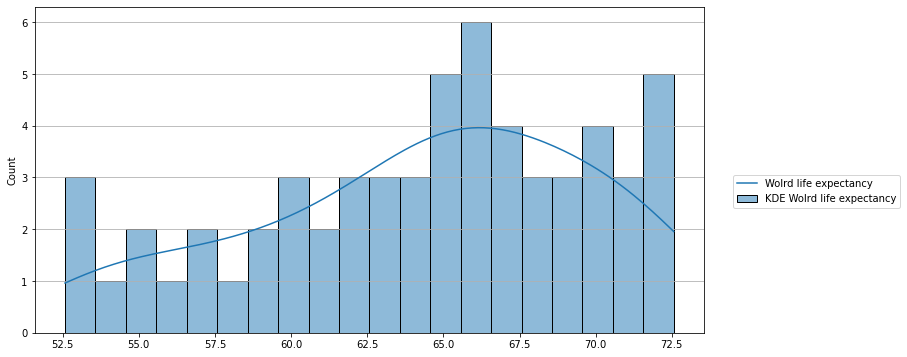

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(df_wld, bins=20, kde=True)
plt.legend(labels=['Wolrd life expectancy','KDE Wolrd life expectancy'], bbox_to_anchor=(1.3, 0.5))
plt.grid(axis='y')

### Nan value's in the dataset
Let's look at the amount of nan in the set.  

In [9]:
print('Empty values in the dataset: ' + str((df_le.isnull().values.ravel().sum())))
print('% of empty values in the dataset: ' + str(round((df_le.isnull().values.ravel().sum()/len(df_le)*100),2)))

Empty values in the dataset: 1331
% of empty values in the dataset: 8.55


There are 1331 empty values in the Life Expectancy column.  
It looks like there is 8.5% data missing.

## Second dataset: Education
This dataset shows 4 different mesurmenst of education in a country:
- Government expenditure on education as % of GDP (%)
- Gross enrolment ratio, primary, female (%)
- Gross enrolment ratio, primary, gender parity index (GPI)
- Out-of-school children of primary school age, both sexes (number)


#### Gross enrolment ratio, primary, female
Total female enrollment in primary and secondary education, regardless of age, expressed as a percentage of the total female population of official primary and secondary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.
#### Gross enrolment ratio, primary, gender parity index
Ratio of female gross enrolment ratio for primary to tertiary to the male value for the same indicator. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.

In [10]:
df_edu = pd.read_csv('DATA/Education.csv', skipfooter=5, engine='python')
df_edu.drop(["2019", "2020"], axis=1, inplace=True)

In [11]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ï»¿Country Name  1072 non-null   object
 1   Series           1072 non-null   object
 2   1987             1072 non-null   object
 3   1988             1072 non-null   object
 4   1989             1072 non-null   object
 5   1990             1072 non-null   object
 6   1991             1072 non-null   object
 7   1992             1072 non-null   object
 8   1993             1072 non-null   object
 9   1994             1072 non-null   object
 10  1995             1072 non-null   object
 11  1996             1072 non-null   object
 12  1997             1072 non-null   object
 13  1998             1072 non-null   object
 14  1999             1072 non-null   object
 15  2000             1072 non-null   object
 16  2001             1072 non-null   object
 17  2002             1072 non-null   

In [12]:
df_edu = df_edu.melt(id_vars=["ï»¿Country Name", 'Series'])

In [13]:
df_edu.rename(columns={'variable': 'Year', 'ï»¿Country Name': 'Country'}, inplace=True)
df_edu.replace('..',np.NaN, inplace=True)
df_edu['value'] = df_edu['value'].astype(float)
df_edu['Year'] = df_edu['Year'].astype(int)

In [14]:
df_edu = df_edu.pivot(index=['Country','Year'], columns='Series', values='value').reset_index()

In [15]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8576 entries, 0 to 8575
Data columns (total 6 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Country                                                            8576 non-null   object 
 1   Year                                                               8576 non-null   int64  
 2   Government expenditure on education as % of GDP (%)                3377 non-null   float64
 3   Gross enrolment ratio, primary, female (%)                         6382 non-null   float64
 4   Gross enrolment ratio, primary, gender parity index (GPI)          6382 non-null   float64
 5   Out-of-school children of primary school age, both sexes (number)  4822 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 402.1+ KB


In [16]:
df_temp = df_edu[(df_edu['Country']=='World')]
df_temp

Series,Country,Year,Government expenditure on education as % of GDP (%),"Gross enrolment ratio, primary, female (%)","Gross enrolment ratio, primary, gender parity index (GPI)","Out-of-school children of primary school age, both sexes (number)"
8448,World,1987,NaN,92.38936,0.87127,105956585.0
8449,World,1988,NaN,93.11169,0.87449,102932829.0
8450,World,1989,NaN,93.40487,0.87658,100160732.0
8451,World,1990,NaN,93.37215,0.88177,101727934.0
8452,World,1991,NaN,93.19520,0.88989,102124924.0
8453,World,1992,NaN,92.94323,0.89617,105376285.0
8454,World,1993,NaN,93.16222,0.90169,106411719.0
8455,World,1994,NaN,93.28868,0.90571,107973043.0
8456,World,1995,NaN,93.47359,0.90784,111890030.0
8457,World,1996,NaN,92.87551,0.91013,115258798.0


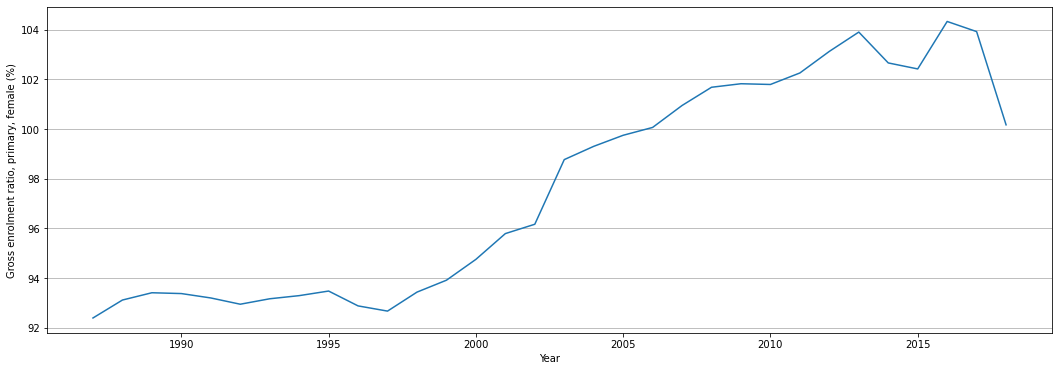

In [17]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_temp, x='Year', y='Gross enrolment ratio, primary, female (%)', markers=True, dashes=False)
plt.grid(axis='y')

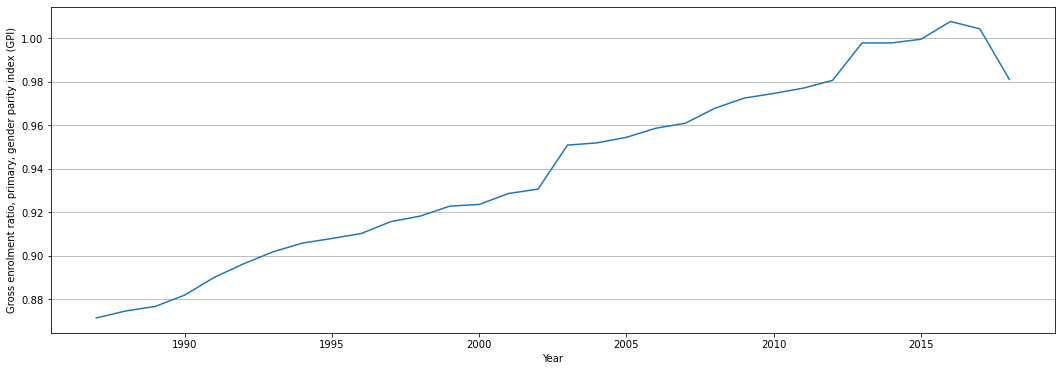

In [18]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_temp, x='Year', y='Gross enrolment ratio, primary, gender parity index (GPI)', markers=True, dashes=False)
plt.grid(axis='y')

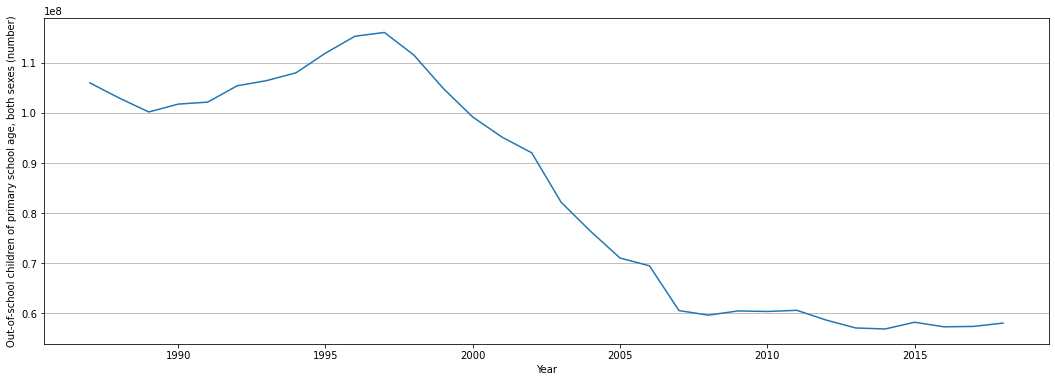

In [19]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_temp, x='Year', y='Out-of-school children of primary school age, both sexes (number)', markers=True, dashes=False)
plt.grid(axis='y')

### Nan value's in the dataset
Let's look at the amount of nan in the set.  

In [20]:
print('Empty values in the dataset: ' + str((df_edu.isna().values.sum())))
print('% of empty values in the dataset: ' + str(round((df_edu.isna().values.sum()/df_edu.size*100),2)) + '%')

Empty values in the dataset: 13341
% of empty values in the dataset: 25.93%


There are 13341 empty values in the value column.  
It looks like there is 25.93% data missing.  
  
Lets look at each missing value per serie

In [21]:
df_edu_na = df_edu.isnull().sum(axis = 0)
df_edu_na.drop(labels=['Country', 'Year'], inplace=True)

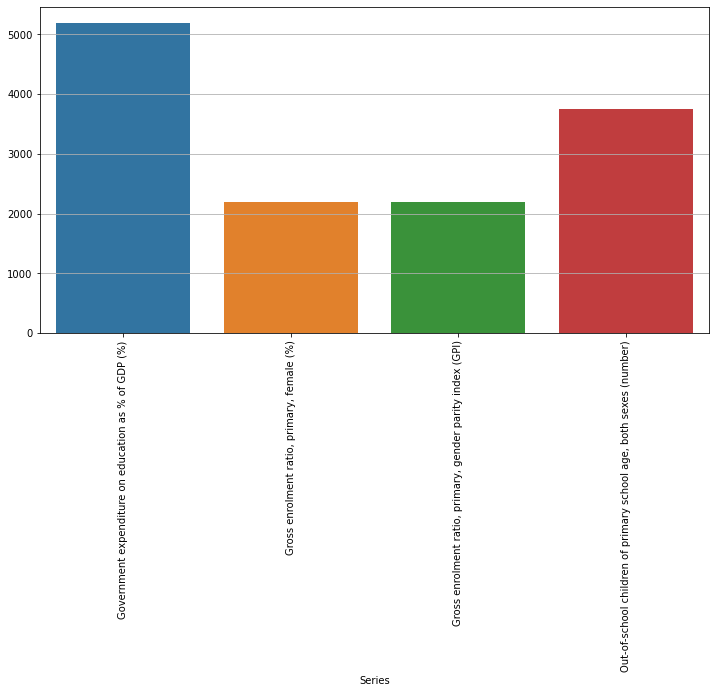

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x = df_edu_na.index, y = df_edu_na.values)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [94]:
print('percentile missing from Government expenditure on education column ' + str(round((df_edu_na['Government expenditure on education as % of GDP (%)']/len(df_edu))*100, 1)) + '%')
print('percentile missing from Gross enrolment ratio, primary, female column ' + str(round(df_edu_na['Gross enrolment ratio, primary, female (%)']/len(df_edu)*100, 1)) + '%')
print('percentile missing from Gross enrolment ratio, primary, gender parity index column ' + str(round(df_edu_na['Gross enrolment ratio, primary, gender parity index (GPI)']/len(df_edu)*100, 1)) + '%')
print('percentile missing from Out-of-school children of primary school column ' + str(round(df_edu_na['Out-of-school children of primary school age, both sexes (number)']/len(df_edu)*100, 1)) + '%')

percentile missing from Government expenditure on education column 60.6%
percentile missing from Gross enrolment ratio, primary, female column 25.6%
percentile missing from Gross enrolment ratio, primary, gender parity index column 25.6%
percentile missing from Out-of-school children of primary school column 43.8%


8576

#### Nan in the Government expenditure on education as % of GDP (%) column

In [60]:
df_GEEGDP = df_edu.drop(["Gross enrolment ratio, primary, female (%)", 
                         "Gross enrolment ratio, primary, gender parity index (GPI)", 
                         'Out-of-school children of primary school age, both sexes (number)'], 
                        axis=1)
df_GEEGDP = df_GEEGDP[df_GEEGDP.isnull().any(axis=1)]

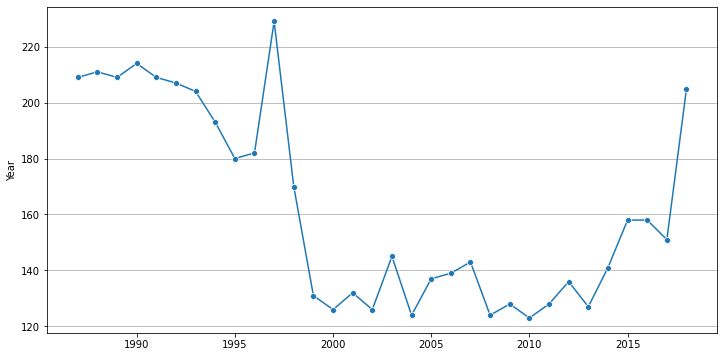

In [62]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_GEEGDP.Year.value_counts(), marker='o')
plt.grid(axis='y')
plt.show()

#### Nan in the Gross enrolment ratio, primary, female (%) column

In [72]:
df_GERPF = df_edu.drop(["Government expenditure on education as % of GDP (%)", 
                         "Gross enrolment ratio, primary, gender parity index (GPI)", 
                         'Out-of-school children of primary school age, both sexes (number)'], 
                        axis=1)
df_GERPF = df_GERPF[df_GERPF.isnull().any(axis=1)]

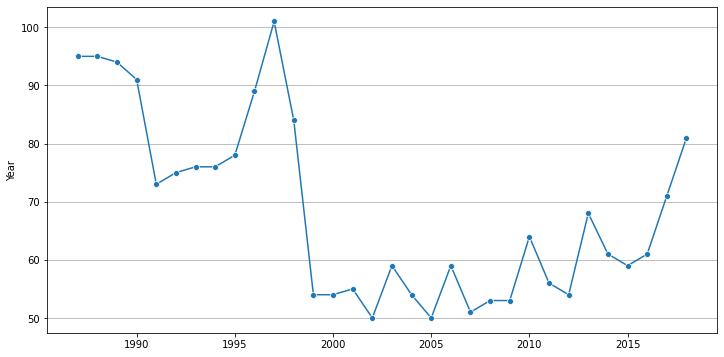

In [73]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_GERPF.Year.value_counts(), marker='o')
plt.grid(axis='y')
plt.show()

#### Nan in the Gross enrolment ratio, primary, gender parity index (GPI) column

In [66]:
df_GERGPI = df_edu.drop(["Gross enrolment ratio, primary, female (%)", 
                         "Government expenditure on education as % of GDP (%)", 
                         'Out-of-school children of primary school age, both sexes (number)'], 
                        axis=1)
df_GERGPI = df_GERGPI[df_GERGPI.isnull().any(axis=1)]

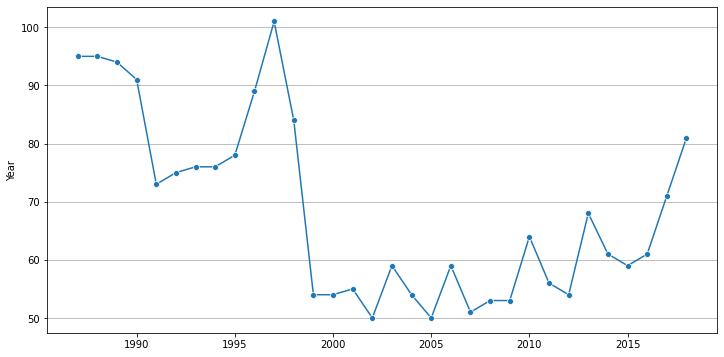

In [68]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_GERGPI.Year.value_counts(), marker='o')
plt.grid(axis='y')
plt.show()

#### Nan in the Out-of-school children of primary school age, both sexes (number) column

In [69]:
df_OOS = df_edu.drop(["Gross enrolment ratio, primary, female (%)", 
                         "Gross enrolment ratio, primary, gender parity index (GPI)", 
                         'Government expenditure on education as % of GDP (%)'], 
                        axis=1)
df_OOS = df_OOS[df_OOS.isnull().any(axis=1)]

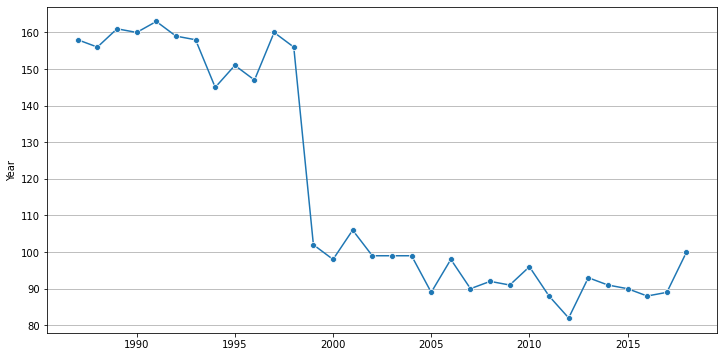

In [71]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_OOS.Year.value_counts(), marker='o')
plt.grid(axis='y')
plt.show()

From this we notice that the na values in the columns Gross enrolment ratio, primary, gender parity index (GPI) and Gross enrolment ratio, primary, female (%) are for the same rows.

## Third dataset: GDP
This dataset shows the GDP per capita per country

In [24]:
df_GDP = pd.read_csv('DATA/GDP_PPP.csv', skiprows=4)

In [25]:
df_GDP.drop(['Indicator Name', 'Indicator Code', '2019', "2020"], axis=1, inplace=True)
df_GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       264 non-null    object 
 1   Country Code  264 non-null    object 
 2   1960          131 non-null    float64
 3   1961          132 non-null    float64
 4   1962          135 non-null    float64
 5   1963          135 non-null    float64
 6   1964          135 non-null    float64
 7   1965          144 non-null    float64
 8   1966          148 non-null    float64
 9   1967          152 non-null    float64
 10  1968          156 non-null    float64
 11  1969          156 non-null    float64
 12  1970          167 non-null    float64
 13  1971          168 non-null    float64
 14  1972          168 non-null    float64
 15  1973          168 non-null    float64
 16  1974          169 non-null    float64
 17  1975          172 non-null    float64
 18  1976          173 non-null    

In [26]:
df_GDP.head()

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.453710,23512.602600,24985.993280,24713.698050,26189.435510,26647.938100,27980.880700,28281.350480,29007.693000,NaN
1,Afghanistan,AFG,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,...,438.076034,543.303042,591.162759,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.140114,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43503.185520,40852.666780,43335.328860,38686.461260,39538.766720,41303.929370,35762.523070,37474.665410,38962.880350,41793.055260


In [27]:
df_GDP = df_GDP.melt(id_vars=["Country", 'Country Code'], value_vars=['1960','1961','1962','1963','1964','1965',
 '1966','1967','1968','1969','1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
 '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
 '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
 '2013', '2014', '2015', '2016', '2017', '2018'])
df_GDP.rename(columns={'variable': 'Year', 'value': 'GDP'}, inplace=True)
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       15576 non-null  object 
 1   Country Code  15576 non-null  object 
 2   Year          15576 non-null  object 
 3   GDP           12168 non-null  float64
dtypes: float64(1), object(3)
memory usage: 486.9+ KB


In [28]:
data=df_GDP[df_GDP['Country']=='World']

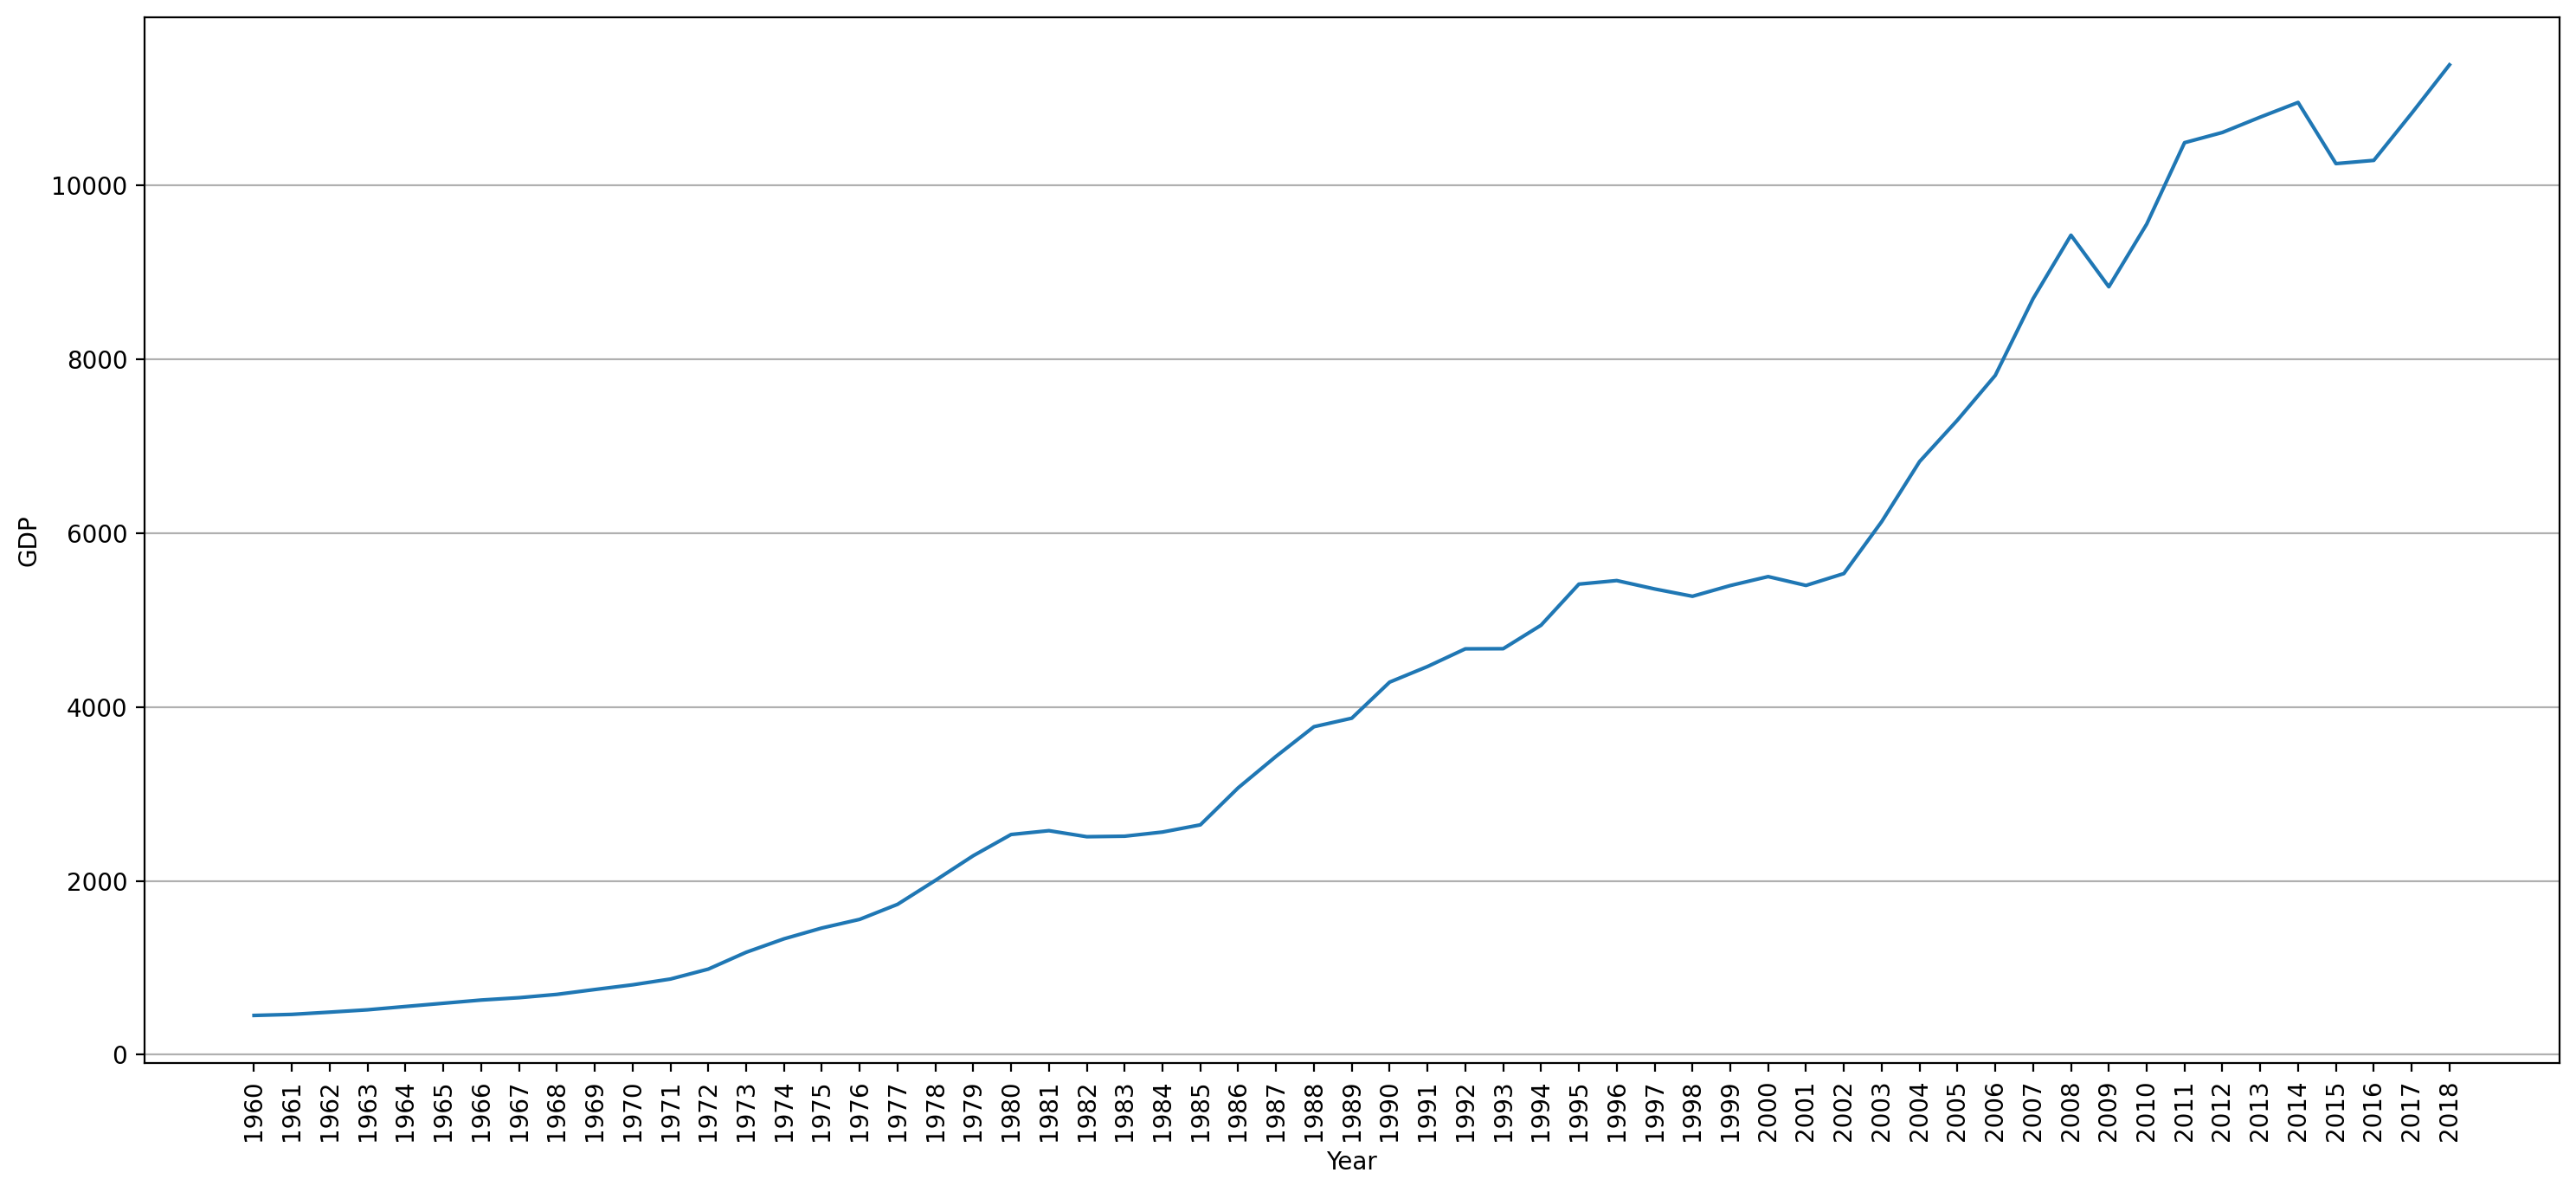

In [29]:
plt.figure(figsize=(18,8), dpi=200)
sns.lineplot(data=data, x='Year', y='GDP')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### Nan value's in the dataset
Let's look at the amount of nan in the set.
It looks like there is 21.9% data missing.

In [30]:
round((df_GDP.isna().sum()['GDP']/len(df_GDP)*100), 2)

21.88

Let's see what country has the most data missing.

In [31]:
df_nan = df_GDP[df_GDP['GDP'].isna()]

In [32]:
df_nan[['GDP']].groupby(df_nan['Country']).agg(['count']).sum()

GDP  count    0
dtype: int64